### 1) Logit 함수

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)

100
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


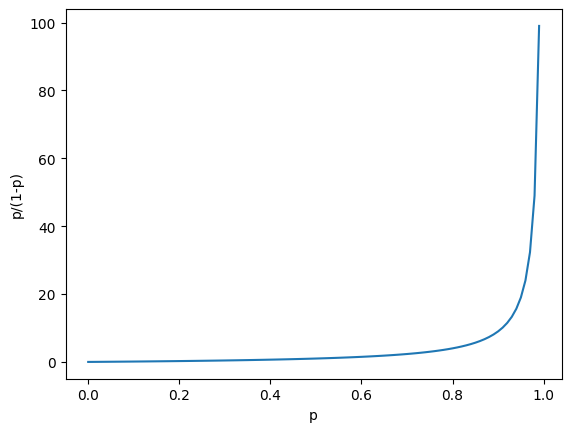

In [2]:
#오즈비
# odds ratio
# 성공확률과 실패 확률의 비율을 나타내는 값
# p / (1-p)  p=성공확률
# p가 0에서 1까지 증가할 때 오즈비는 처음에 천천히 증가하지만 p가 1에 가까워지면 급격히 증가함

probs = np.arange(0, 1, 0.01) # 0~1, 0.01 간격의 리스트
#                 start, stop, step
print(len(probs))
print(probs)

odds = [p/(1-p) for p in probs]

plt.plot(probs, odds)
plt.xlabel('p')
plt.ylabel('p/(1-p)')
plt.show()

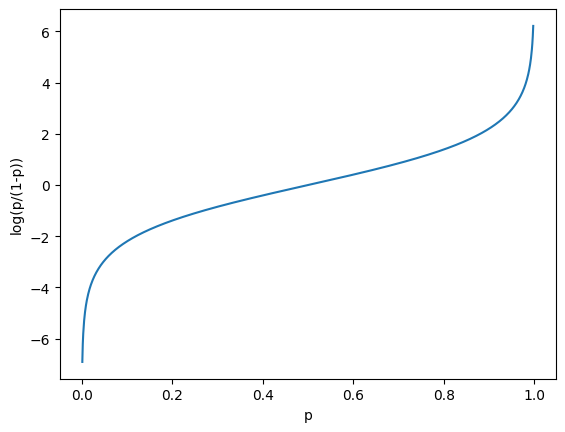

In [3]:
#logit 함수
#오즈 비에 로그 함수를 취하여 만든 함수
# log( p / (1-p) ) = z
# p가 0.5일 때 0이 되고 p가 0과 1일 때 각각 무한대로 음수와 양수가 되는 특징

probs  = np.arange(0.001, 0.999, 0.001)

logit = [np.log(p/(1-p)) for p in probs]

plt.plot(probs, logit)
plt.xlabel('p')
plt.ylabel('log(p/(1-p))')
plt.show()

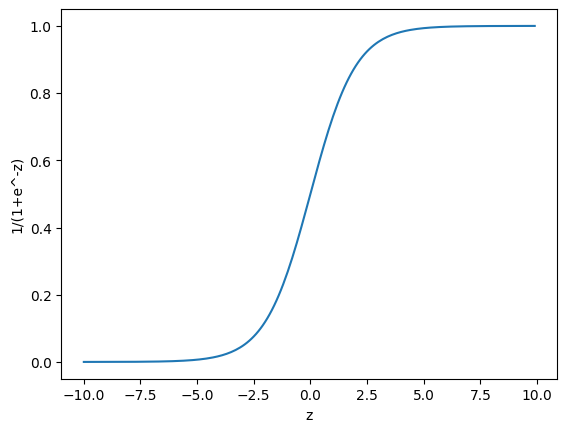

In [4]:
# log( p / (1-p) ) = z
# 위의 식을 z에 대해 정리한 식(로지스틱 함수, sigmoid 함수라고도 함)
# logit 함수의 x,y축이 바뀐 모양
# p = 1/(1+e^-z)

zs = np.arange(-10., 10., 0.1)

gs = [1/(1+np.exp(-z)) for z in zs]

plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('1/(1+e^-z)')
plt.show()

### 2) forge 데이터셋(임의로 생성한 데이터셋)

(26, 2)


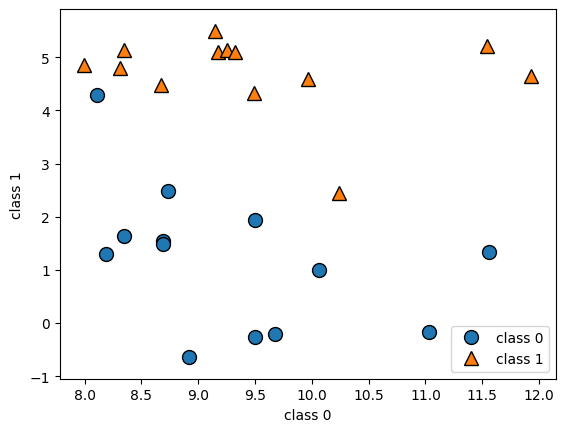

In [5]:
#pip install mglearn

from matplotlib import pyplot as plt
import mglearn

#plt.rcParams['figure.dpi'] = 300
# forge 데이터셋 생성

X, y = mglearn.datasets.make_forge()

# 산점도 그리기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["class 0", "class 1"], loc=4)
plt.xlabel("class 0")
plt.ylabel("class 1")

#데이터포인트 26개와 특성 2개
print(X.shape)

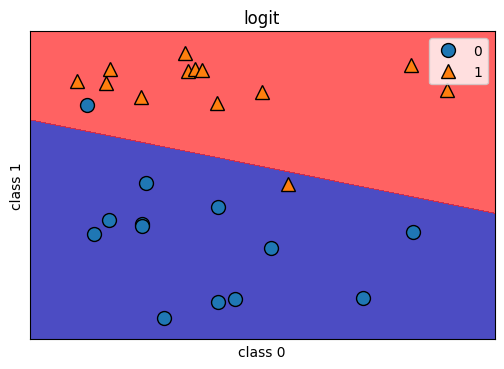

In [6]:
#분류용 선형 모델(로지스틱 회귀)
#로지스틱 회귀분석은 회귀분석이 아니라 분류 알고리즘에 해당됨

from sklearn.linear_model import LogisticRegression

fig, axes = plt.subplots(1,1, figsize=(6, 4))

model=LogisticRegression()

#모델을 학습시킴
model = model.fit(X, y)

mglearn.plots.plot_2d_separator(model, X, fill=True, eps=0.5, ax=axes, alpha=.7)

#산점도 그리기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=axes)

axes.set_title("logit")
axes.set_xlabel("class 0")
axes.set_ylabel("class 1")
axes.legend()

#결정경계가 직선으로 표현되었고
#위쪽 클래스1
#아래쪽 클래스 0
#새로운 데이터가 직선 위에 놓이면 클래스1
#반대로 직선 아래쪽에 놓이면 클래스 0
#포인트 2개가 잘못 분류됨

In [7]:
model.score(X,y)    # 분류 정확도

0.9230769230769231

In [8]:
from sklearn.metrics import confusion_matrix

pred=model.predict(X)

print(pred) # 예측값
print(y)    # 실제값

confusion_matrix(y,pred)

[1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0]
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


array([[12,  1],
       [ 1, 12]], dtype=int64)

### 5) 로지스틱 회귀 모형의 Cost

In [9]:
import pandas as pd

df = pd.read_csv("c:/workspace3/data/train3.csv")
df.head()

,Survived,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
0,0,0,0,1,1,0,22.0,1,0,7.2500
1,1,1,0,0,0,1,38.0,1,0,71.2833
2,1,0,0,1,0,1,26.0,0,0,7.9250
3,1,1,0,0,0,1,35.0,1,0,53.1000
4,0,0,0,1,1,0,35.0,0,0,8.0500


In [10]:
df.columns

Index(['Survived', 'Pclass1', 'Pclass2', 'Pclass3', 'male', 'female', 'Age',
       'SibSp', 'Parch', 'Fare'],
      dtype='object')

In [11]:
cols=['Pclass1', 'Pclass2', 'Pclass3', 'male',
       'female', 'Age', 'SibSp', 'Parch', 'Fare']

X = df[cols] # 독립변수
y = df["Survived"]

print(X)
print(y)

     Pclass1  Pclass2  Pclass3  male  female   Age  SibSp  Parch     Fare
0          0        0        1     1       0  22.0      1      0   7.2500
1          1        0        0     0       1  38.0      1      0  71.2833
2          0        0        1     0       1  26.0      0      0   7.9250
3          1        0        0     0       1  35.0      1      0  53.1000
4          0        0        1     1       0  35.0      0      0   8.0500
..       ...      ...      ...   ...     ...   ...    ...    ...      ...
886        0        1        0     1       0  27.0      0      0  13.0000
887        1        0        0     0       1  19.0      0      0  30.0000
888        0        0        1     0       1  30.0      1      2  23.4500
889        1        0        0     1       0  26.0      0      0  30.0000
890        0        0        1     1       0  32.0      0      0   7.7500

[891 rows x 9 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    

In [12]:
#언더샘플링

from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Survived'])

df2=pd.concat([X_samp,y_samp],axis=1)
df2.Survived.value_counts()

X = X_samp[cols] # 독립변수
y = y_samp["Survived"]

print(len(X))
print(len(y))

684
684


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1000.0, random_state=0)
model.fit(X_train, y_train)
print(model.score(X_train,y_train))  
print(model.score(X_test,y_test))

pred = model.predict(X_test)
print("오분류 샘플수 : %d" % (y_test != pred).sum())

0.7641681901279708
0.8029197080291971
오분류 샘플수 : 27


In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,pred))  # 정확도
print(precision_score(y_test,pred)) # ㅈ
print(recall_score(y_test,pred))  
print(f1_score(y_test,pred))

0.8029197080291971
0.8059701492537313
0.7941176470588235
0.8


In [16]:
from sklearn.metrics import confusion_matrix

y =    [1, 0, 1, 1, 0, 1]
pred = [0, 0, 1, 1, 0, 1]

confusion_matrix(y, pred)

#        0   1
#    0   2   0
#    1   1   3

array([[2, 0],
       [1, 3]], dtype=int64)

In [17]:
# TN(True Negative) : 0을 0으로 맞춘 경우
# FP(False Positive) : 0인데 1로 틀린 경우
# FN(False Negative) : 1인데 0으로 틀린 경우
# TP(True Positive) : 1을 1로 맞춘 경우
# ravel() 다차원배열을 1차원배열로 변환

tn,fp,fn,tp = confusion_matrix(y, pred).ravel()

print(tn,fp,fn,tp)

2 0 1 3


In [18]:
# precision(정확도, 정밀도) : 모델이 True라고 분류한 것 중에서 실제 True의 비율  
# tp / (tp+fp)

y =    [0, 1, 0, 0]
pred = [0, 1, 1, 0]

# 모델이 2개를 1로 분류하였으나 실제 1인 개수는 1이므로 정밀도는 0.5
precision_score(y, pred)    # 모형의 정확도

0.5

In [19]:
# recall(재현율, 검출율) : 실제값이 True인 것 중에서 모델이 True라고 예측한 것의 비율  
# tp / (tp+fn)
# precision은 모델의 입장에서 recall은 실제 정답의 입장에서(바라보고자 하는 관점이 다름)
# 일반적으로 precision과 recall은 반비례 관계

y    = [0, 1, 1, 0]
pred = [0, 1, 0, 0]

# 실제값이 1인 개수 2, 모델이 1로 맞춘 개수 1
recall_score(y, pred)   # 실제 정확도

0.5

In [20]:
from sklearn.metrics import classification_report

# f1-score : precision과 recall의 조화평균(불균형 데이터셋에 많이 사용하는 평가 지표)
#    2*p*r / p+r
# support : 실제값의 개수(0이 1개, 1이 3개)
# accuracy : 정확도
# macro avg : 단순평균(모든 클래스를 동일한 비중으로 고려)
# weighted avg : 각 클래스에 속하는 표본의 개수로 가중평균(f1-score와 같은 값)

y    = np.array([0, 1, 1, 1])
pred = np.array([0, 1, 0, 0])

print(classification_report(y, pred))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.33      0.50         3

    accuracy                           0.50         4
   macro avg       0.67      0.67      0.50         4
weighted avg       0.83      0.50      0.50         4



In [21]:
# Cost : 기본값 1.0
# Cost가 크면 과대적합
# Cost가 낮으면 과소적합
# 실험을 통해 최적의 Cost 값을 얻어내는 코드

costs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
results=[]

for c in costs:
    params = {'C':c, 'max_iter': 1000}
    model = LogisticRegression(**params).fit(X_train, y_train)
    score=model.score(X_test,y_test)
    results.append(score)
print(results)    

[0.6496350364963503, 0.781021897810219, 0.8029197080291971, 0.8029197080291971, 0.8029197080291971, 0.8029197080291971, 0.8029197080291971]


최고 정확도: 0.8029197080291971
최적의 C: 0.1


Text(0, 0.5, 'Accuracy')

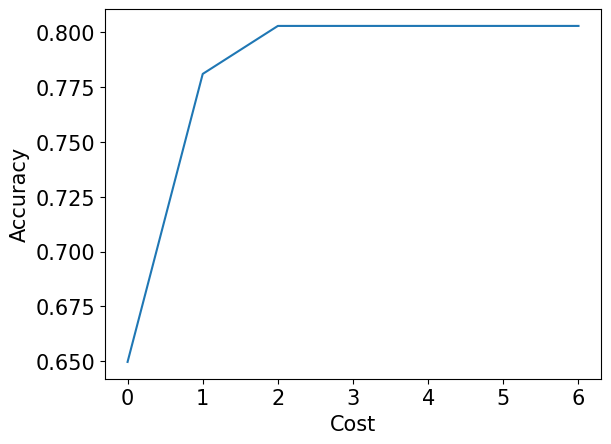

In [22]:
import matplotlib.pyplot as plt
import numpy as np

m=max(results)
for i,a in enumerate(results):
# 인덱스,값
    if a==m:
        n=i
        break
print('최고 정확도:',m)
print('최적의 C:',costs[n])

plt.rcParams["font.size"]=15
plt.plot(range(len(costs)), results)
plt.xlabel('Cost')
plt.ylabel('Accuracy')

### 6) 로지스틱 회귀 모형의 class-weight

In [23]:
import pandas as pd

df = pd.read_csv("c:/workspace3/data/iris.csv")
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [24]:
#처음 40행 제거

df2=df.drop(df.index[range(40)])

In [25]:
df2.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name',
       'Species'],
      dtype='object')

In [26]:
cols=['SepalLength','SepalWidth','PetalLength', 'PetalWidth']

X = df2[cols]
y = df2['Species']

df2.Species.value_counts() #불균형 데이터셋

#   0   1   2               0   1   2
#   50  50  50      =>      10  50  50

Species
1    50
2    50
0    10
Name: count, dtype: int64

In [28]:
df2

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Species
40,5.0,3.5,1.3,0.3,setosa,0
41,4.5,2.3,1.3,0.3,setosa,0
42,4.4,3.2,1.3,0.2,setosa,0
43,5.0,3.5,1.6,0.6,setosa,0
44,5.1,3.8,1.9,0.4,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


Text(0.5, 1.0, 'iris\n (0: setosa, 1: versicolor, 2: virginica )')

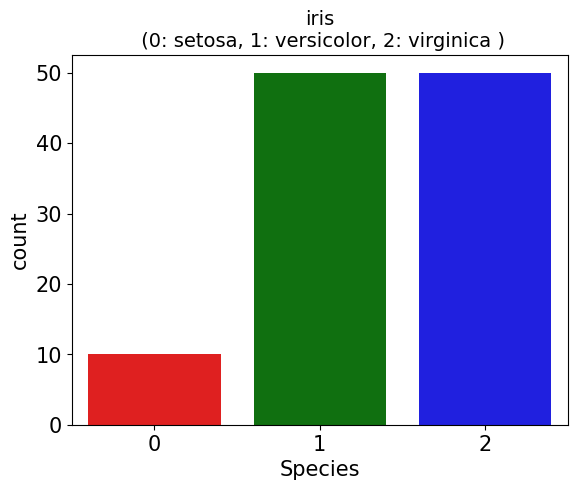

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["red", "green", "blue"]

sns.countplot(x='Species', data=df2, palette=colors)
plt.title('iris\n (0: setosa, 1: versicolor, 2: virginica )', fontsize=14)

In [ ]:
#불균형 데이터셋의 경우 언더샘플링 또는 오버샘플링을 하는 것이 일반적인 방법이지만
#여기서는 class_weight 속성을 알아보기 위해 샘플링 과정을 생략함

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

y_train.value_counts()

Species
1    40
2    40
0     8
Name: count, dtype: int64

In [32]:
from sklearn.linear_model import LogisticRegression

#기본 옵션 : 모든 클래스에 1이 부여됨(가중치 없음)
logit1 = LogisticRegression(random_state=0)
#                                                   0   1   2
#                                                   10  50  50

#샘플수에 반비례하는 가중치를 n_samples / (n_classes * np.bincount (y))로 자동 조정
logit2 = LogisticRegression(random_state=0, class_weight='balanced')
#                                                  샘플비율 고려

#가중치를 직접 입력하는 옵션
logit3 = LogisticRegression(random_state=0, class_weight={0:3, 1:1, 2:2})
#                                                   직접 지정
#                                                   0   1   2
#                                                   30  50  100

In [33]:
# class_weight='balanced'일 경우 샘플 개수에 반비례하는 가중치가 곱해짐

import numpy as np

print(np.bincount(y)) # 샘플의 개수(10/50/50)

# n_samples / (n_classes * np.bincount (y))
print(88 / (3 * np.bincount(y)))

[10 50 50]
[2.93333333 0.58666667 0.58666667]


In [34]:
for logit in [logit1,logit2,logit3]:
    logit.fit(X_train, y_train)

    print(logit)
    print("학습용:",logit.score(X_train, y_train))
    print("검증용:",logit.score(X_test, y_test))
    print()

# logit3 모형은 class 0의 샘플수가 너무 적으므로 경고 메시지가 출력될 수 있음

LogisticRegression(random_state=0)
학습용: 0.9545454545454546
검증용: 1.0

LogisticRegression(class_weight='balanced', random_state=0)
학습용: 0.9545454545454546
검증용: 1.0

LogisticRegression(class_weight={0: 3, 1: 1, 2: 2}, random_state=0)
학습용: 0.9545454545454546
검증용: 1.0



### 7) 로지스틱 회귀 모형의 penalty 부여 방식

In [ ]:
#   L1  오차의 절대값
#   L2  오차의 제곱

In [35]:
import pandas as pd

df = pd.read_csv("c:/workspace3/data/iris.csv")
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [36]:
df.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name',
       'Species'],
      dtype='object')

In [37]:
cols=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

X=df[cols]
y=df['Species']

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
y_train.value_counts()

Species
0    40
1    40
2    40
Name: count, dtype: int64

In [ ]:
# 회귀계수들이 학습용 데이터에 과적합이 되지 않도록 정규화 요소를 더해주는 기법
# 과적합이 발생할 수 있는 수치에 Penalty를 부여하는 방식
# l1, l2, elasticnet, none
# l1 : 오차의 절대값에 penalty 부여
#  LASSO(Least Absolute Shrinkage Selector Operator) Penalty
#  변수들이 많을 경우 실질적으로 영향을 미치는 변수의 개수는 적을 것이라는 가정
#  영향이 적은 변수들을 0으로 보내서 없애고 영향력이 큰 변수들만 선택
#  모형을 단순화시켜 해석이 용이함
# l2 : 오차를 제곱한 값에 penalty 부여(일반적으로 사용하는 방식)
#  Ridge Penalty
#  변수들 간의 공선성 구조가 있을 때 사용
#  공선성이 있을 경우 변수는 많지만 실제 사용가능한 정보는 적음
#  변수들간의 분산을 감소시키는 기능
# elasticnet : LASSO와 Ridge의 혼합형
#   변수도 줄이고 분산도 줄이고 싶은 경우에 사용
# none : penalty를 사용하지 않음
# solver : 최적화(최적의 가중치를 설정)에 사용할 알고리즘( newton-cg, lbfgs, liblinear, sag, saga )
#   lbfgs(Limited Memory Broyden–Fletcher–Goldfarb–Shanno) : 기본값
#   liblinear : small dataset에 적합
#   sag(Stochastic Average Gradient descent), saga(Variant of Sga) : big dataset에 적합
#   newton-cg, saga, lbfgs : multi class 지원

In [40]:
rom sklearn.linear_model import LogisticRegression

models = [
    LogisticRegression(random_state=0, penalty='l1', solver='liblinear'),

    #기본옵션
    LogisticRegression(random_state=0, penalty='l2',max_iter=1000),
    LogisticRegression(random_state=0, penalty='elasticnet', solver='saga', l1_ratio=1, max_iter=5000),
    LogisticRegression(random_state=0, penalty='none')
]    

for logit in models:
    print(logit)
    logit.fit(X_train, y_train)
    print("학습용:",logit.score(X_train, y_train))
    print("검증용:",logit.score(X_test, y_test))


LogisticRegression(penalty='l1', random_state=0, solver='liblinear')
학습용: 0.9583333333333334
검증용: 0.9666666666666667

LogisticRegression(max_iter=1000, random_state=0)
학습용: 0.9666666666666667
검증용: 1.0

LogisticRegression(l1_ratio=1, max_iter=5000, penalty='elasticnet',
                   random_state=0, solver='saga')
학습용: 0.95
검증용: 1.0

LogisticRegression(penalty='none', random_state=0)
학습용: 0.9833333333333333
검증용: 1.0



c:\Python3.9.13\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


### 8) 불균형 데이터셋 문제
##### 1. 언더 샘플링

In [41]:
import pandas as pd

from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

dfX=pd.DataFrame(X,columns=['a','b'])

dfy=pd.DataFrame(y,columns=['y'])

df=pd.concat([dfX,dfy],axis=1)

df

,a,b,y
0,0.222014,0.540207,0
1,1.347439,1.412824,0
2,0.537238,0.372730,0
3,2.134462,1.404819,0
4,2.315827,1.356858,0
...,...,...,...
9995,2.440385,1.695643,0
9996,-0.790502,0.194243,0
9997,1.878130,0.829500,0
9998,2.585933,1.927995,0


In [42]:
X1 = df[['a','b']] # 독립변수

y1 = df["y"]

df["y"].value_counts() #불균형 데이터셋

y
0    9900
1     100
Name: count, dtype: int64

In [43]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2,  stratify=y1, random_state=10)

In [44]:
#불균형 데이터셋으로 만든 모형

model1 = LogisticRegression(random_state=0)

model1.fit(X_train, y_train)

print("학습용:",model1.score(X_train, y_train))

print("검증용:",model1.score(X_test, y_test))

학습용: 0.994125
검증용: 0.995


In [45]:
from sklearn.metrics import confusion_matrix

pred1=model1.predict(X_test)

confusion_matrix(y_test, pred1)

array([[1980,    0],
       [  10,   10]], dtype=int64)

In [46]:
from sklearn.metrics import classification_report

#소수 클래스의 정확도와 precision, precision,recall,f1-score 확인

print(classification_report(y_test, pred1))

# score는 0.9945로 높으나 recall의 경우 10/(10+10) = 0.5로 낮아지는 문제가 발생함

#모형의 전반적인 정확도(accuracy)는 높지만 소수 클래스의 재현율(recall)이 0.5로 낮은 문제점

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1980
           1       1.00      0.50      0.67        20

    accuracy                           0.99      2000
   macro avg       1.00      0.75      0.83      2000
weighted avg       1.00      0.99      0.99      2000



In [47]:
#균형 데이터

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, flip_y=0, random_state=1)

dfX=pd.DataFrame(X,columns=['a','b'])

dfy=pd.DataFrame(y,columns=['y'])

df2=pd.concat([dfX,dfy],axis=1)

df2["y"].value_counts()

y
0    5000
1    5000
Name: count, dtype: int64

In [48]:
X2 = df2[['a','b']] # 독립변수

y2 = df2["y"]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, stratify=y2, random_state=10)



In [50]:
model2 = LogisticRegression(random_state=42)

model2.fit(X_train, y_train)

print("학습용:",model2.score(X_train, y_train))

print("검증용:",model2.score(X_test, y_test))

학습용: 0.896125
검증용: 0.891


In [51]:
pred2=model2.predict(X_test)

print(classification_report(y_test, pred2))

#정확도와 재현율이 비슷하게 처리됨

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1000
           1       0.90      0.87      0.89      1000

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000



In [52]:
len(X1),len(y1),len(pred1)

(10000, 10000, 2000)

In [ ]:
#비대칭 데이터는 언더샘플링, 오버샘플링, 복합샘플링 등의 방법으로 데이터 비율을 맞추면 정밀도가 향상된다.

In [53]:
X, y = make_classification(n_samples=10000, n_features=2,  n_redundant=0, n_clusters_per_class=1, weights=[0.99],     flip_y=0, random_state=1)

In [ ]:
#언더샘플링: 데이터의 손실이 크고 중요한 특성을 가진 데이터를 잃을 수 있음

In [54]:
#무작위로 다수 클래스의 데이터를 없애는 단순 샘플링

from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample,columns=['a','b'] )

y_samp = pd.DataFrame(data=y_sample,columns=['y'])

y_samp.y.value_counts()

y
0    100
1    100
Name: count, dtype: int64

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_samp, y_samp, test_size=0.2, stratify=y_samp,random_state=10)

model3 = LogisticRegression(random_state=42)

model3.fit(X_train, y_train)

print("학습용:",model3.score(X_train, y_train))

print("검증용:",model3.score(X_test, y_test))

학습용: 0.8625
검증용: 0.925


c:\Python3.9.13\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [56]:
pred3=model3.predict(X_test)

print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.90      0.95      0.93        20

    accuracy                           0.93        40
   macro avg       0.93      0.93      0.92        40
weighted avg       0.93      0.93      0.92        40



In [57]:
#토멕링크(Tomek's link) : 서로 다른 클래스에 속하는 한쌍의 데이터

#  토멕링크 중에서 다수 클래스에 속한 샘플을 제거함으로써 데이터의 균형을 맞추는 방법

# 'majority': 다수 클래스의 샘플을 제거

# 'not minority': 소수 클래스를 제외하고 샘플링

# 'not majority': 다수 클래스를 제외하고 샘플링

# 'all': 모든 클래스를 샘플링

# 'auto': not minority와 같음(기본 옵션)

In [58]:
from imblearn.under_sampling import TomekLinks
X_sample,y_sample=TomekLinks(sampling_strategy='majority').fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample,columns=['a','b'] )

y_samp = pd.DataFrame(data=y_sample,columns=['y'])

y_samp.y.value_counts()

#토멕링크 중에서 다수 클래스의 샘플들을 제거하는 방식, 1:1로 맞추는 방식은 아님

y
0    9874
1     100
Name: count, dtype: int64

In [59]:
#CNN(Condensed Nearest Neighbour) : 1-NN 모형으로 분류되지 않는 데이터만 남기는 방법

#다수의 데이터 중에서 하나를 골라서 최근접 이웃이 다수 클래스이면 그 샘플을 빼는 방식

#시간이 많이 걸림

from imblearn.under_sampling import CondensedNearestNeighbour

X_sample, y_sample = CondensedNearestNeighbour(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample,columns=['a','b'] )

y_samp = pd.DataFrame(data=y_sample,columns=['y'])

y_samp.y.value_counts()

#1:1로 맞춰지지는 않음

y
0    187
1    100
Name: count, dtype: int64

In [ ]:
# One Sided Selection

# 토맥링크 방법과 Condensed Nearest Neighbour 방법을 섞은 방식

# 토맥링크 중 다수 클래스의 샘플을 제거하고

# 나머지 데이터 중에서도 서로 붙어있는 다수 클래스 데이터는 1-NN 방법으로 제외하는 방식

from imblearn.under_sampling import OneSidedSelection

X_sample, y_sample = OneSidedSelection(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample,columns=['a','b'] )

y_samp = pd.DataFrame(data=y_sample,columns=['y'])

y_samp.y.value_counts()

In [ ]:
#ENN(Edited Nearest Neighbours)

# 다수 클래스 데이터 중 소수 클래스와 가장 가까운 k(n_neighbors)개의 데이터가

# 모두 또는 다수 클래스가 아니면 삭제하는 방법

# 소수 클래스 주변의 다수 클래스 데이터는 삭제됨

from imblearn.under_sampling import EditedNearestNeighbours
#kind_sel='all' 모두, kind_sel='mode' 다수

# 5개의 이웃이 모두 같은 클래스가 아니면 그 샘플을 제거함

X_sample, y_sample= EditedNearestNeighbours(kind_sel="all", n_neighbors=5).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample,columns=['a','b'] )

y_samp = pd.DataFrame(data=y_sample,columns=['y'])

y_samp.y.value_counts()

In [ ]:
#Neighbourhood Cleaning Rule

# CNN(Condensed Nearest Neighbour) 방법과 ENN(Edited Nearest Neighbours) 방법을 섞은 것

from imblearn.under_sampling import NeighbourhoodCleaningRule

#kind_sel='all' 모두, kind_sel='mode' 다수

X_sample,y_sample=NeighbourhoodCleaningRule(kind_sel="all", n_neighbors=5).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample,columns=['a','b'] )

y_samp = pd.DataFrame(data=y_sample,columns=['y'])

y_samp.y.value_counts()